## Gather

In [28]:
import pandas as pd
import numpy as np
import requests
import io
import json

In [17]:
# read file given
dog = pd.read_csv('twitter-archive-enhanced.csv')

In [19]:
# read file from online
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv').content

In [22]:
image = pd.read_csv(io.StringIO(r.decode('utf-8')), sep='\t')

In [115]:
# save to file for processing later
image.to_csv('image-predictions.tsv', index=False)

In [116]:
image = pd.read_csv('image-predictions.tsv')

In [ ]:
# twitter api code to import tweet's entire set of JSON data in tweet_json.txt
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


In [52]:
# load JSON data into `df_tweet_likes`
text_file_path = 'tweet-json.txt'
tweet = pd.read_json(text_file_path, lines = True)
# subset columns using `df[[_columns_]]` notation
columns_of_interest = ['id', 'retweet_count', 'favorite_count']
tweet = tweet[columns_of_interest]
# rename column 'id' to 'tweet_id'
tweet.rename(columns={'id':'tweet_id'}, inplace=True)

<hr>

## Assess

#### dog dataframe

In [53]:
dog

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [56]:
list(dog)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [55]:
dog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [60]:
dog.doggo.value_counts(), dog.floofer.value_counts(), dog.pupper.value_counts(), dog.puppo.value_counts()

(None     2259
 doggo      97
 Name: doggo, dtype: int64, None       2346
 floofer      10
 Name: floofer, dtype: int64, None      2099
 pupper     257
 Name: pupper, dtype: int64, None     2326
 puppo      30
 Name: puppo, dtype: int64)

In [62]:
dog.tweet_id.duplicated().sum()

0

In [135]:
dog[dog.in_reply_to_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


In [140]:
dog[dog.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [141]:
dog[dog.name == 'Canela']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Canela. She attempted some fancy porch...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None


In [83]:
dog.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [84]:
dog.name.value_counts()

None            745
a                55
Charlie          12
Oliver           11
Cooper           11
Lucy             11
Tucker           10
Penny            10
Lola             10
Winston           9
Bo                9
the               8
Sadie             8
an                7
Buddy             7
Toby              7
Daisy             7
Bailey            7
Leo               6
Jack              6
Scout             6
Rusty             6
Oscar             6
Bella             6
Milo              6
Koda              6
Dave              6
Jax               6
Stanley           6
Phil              5
               ... 
Cleopatricia      1
Flash             1
Duddles           1
Stuart            1
Marq              1
Ralphson          1
Halo              1
Jordy             1
Newt              1
Snoopy            1
Gerbald           1
Gordon            1
Shawwn            1
Barney            1
Philippe          1
Pete              1
Shnuggles         1
Brooks            1
Beya              1


In [224]:
list(dog[dog.name == 'a'].text)

['Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF',
 'Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq',
 'Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn',
 'This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW',
 'Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R',
 'This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2',
 'This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKC

In [95]:
dog[dog.name.str.contains('^[a-z]\w+')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Occasionally, we're sent fantastic stories. Th...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/828650029...,14,10,one,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024...,11,10,incredibly,None,None,None,None
682,788552643979468800,NaN,NaN,2016-10-19 01:29:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to mad pupper. You kn...,7.363926e+17,4.196984e+09,2016-05-28 03:04:00 +0000,"https://vine.co/v/iEggaEOiLO3,https://vine.co/...",13,10,mad,None,None,pupper,None
759,778396591732486144,NaN,NaN,2016-09-21 00:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is an East African Chalupa...,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None
773,776249906839351296,NaN,NaN,2016-09-15 02:42:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. Pls stop sen...,7.007478e+17,4.196984e+09,2016-02-19 18:24:26 +0000,https://twitter.com/dog_rates/status/700747788...,11,10,very,None,None,None,None


In [240]:
dog[dog.name.str.contains('^[a-z]\w+?')].name.value_counts()

the             8
an              7
very            5
quite           4
just            4
one             4
actually        2
not             2
getting         2
mad             2
space           1
old             1
officially      1
unacceptable    1
light           1
life            1
my              1
this            1
such            1
by              1
incredibly      1
his             1
all             1
infuriating     1
Name: name, dtype: int64

In [102]:
list(dog[dog.name.str.contains('^[a-z]\w+')].text)

["I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba",
 "RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…",
 "We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9",
 "Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",
 "There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10  \nhttps://t.co/dp5h9bCwU7",
 "Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",
 'We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi',
 'RT @dog_rates: Say hello t

In [109]:
list(dog.text.sample(5))

["RT @dog_rates: This is Bo. He's a Benedoop Cumbersnatch. Seems frustrated with own feet. Portable as hell. 11/10 very solid pupper https://…",
 "This is Antony. He's a Sheraton Tetrahedron. Skips awkwardly. Doesn't look when he crosses the road (reckless). 7/10 https://t.co/gTy4WMXu8l",
 "Meet Vincent. He's a wild Adderall Cayenne. Shipped for free. Always fresh. Never frozen. 10/10 great purchase https://t.co/ZfS7chSsi7",
 "Super rare dog right here guys. Doesn't bark. Seems strong. Blue. Very family friendly pet. 10/10 overall good dog https://t.co/Jykq2iq3qN",
 "This is Asher. He's not wearing a seatbelt or keeping both paws on the wheel. Absolute menace on the roadways. 9/10 https://t.co/V3SWuHACkh"]

In [180]:
(dog.rating_denominator / dog.rating_numerator).value_counts()

0.833333     562
0.909091     469
1.000000     463
0.769231     351
1.111111     157
1.250000     102
0.714286      54
1.428571      54
2.000000      38
1.666667      32
3.333333      19
2.500000      15
5.000000      11
10.000000      8
0.666667       2
0.023810       2
1.222222       2
inf            2
0.133333       2
0.384615       1
0.291667       1
0.000000       1
0.054945       1
0.370370       1
1.571429       1
0.588235       1
0.015015       1
1.363636       1
0.005631       1
0.800000       1
dtype: int64

<hr>

#### image dataframe

In [265]:
image.sample(10)

,Unnamed: 0,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
938,938,703631701117943808,https://pbs.twimg.com/media/CcPNS4yW8AAd-Et.jpg,2,window_shade,0.909533,False,window_screen,0.011427,False,brass,0.008882,False
1816,1816,833863086058651648,https://pbs.twimg.com/media/C5J6DIpWQAEosSz.jpg,1,kuvasz,0.494969,True,Great_Pyrenees,0.312632,True,golden_retriever,0.141736,True
446,446,674664755118911488,https://pbs.twimg.com/media/CVzkA7-WsAAcXz6.jpg,1,African_crocodile,0.330625,False,American_alligator,0.075356,False,mink,0.057481,False
1368,1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1245,1245,747512671126323200,https://pbs.twimg.com/media/Cl-yykwWkAAqUCE.jpg,1,Cardigan,0.111493,True,malinois,0.095089,True,German_shepherd,0.080146,True
1307,1307,753420520834629632,https://pbs.twimg.com/ext_tw_video_thumb/75342...,1,balloon,0.267961,False,lakeside,0.085764,False,rapeseed,0.040809,False
828,828,693590843962331137,https://pbs.twimg.com/media/CaAhMb1XEAAB6Bz.jpg,1,dining_table,0.383448,False,grey_fox,0.103191,False,Siamese_cat,0.098256,False
147,147,668631377374486528,https://pbs.twimg.com/media/CUd0sSvWsAA85wO.jpg,1,miniature_schnauzer,0.904549,True,Australian_terrier,0.022529,True,silky_terrier,0.015243,True
1151,1151,732375214819057664,https://pbs.twimg.com/media/CinrX2EWkAABDYt.jpg,1,tennis_ball,0.998673,False,basset,0.000547,True,golden_retriever,0.000360,True
178,178,669216679721873412,https://pbs.twimg.com/media/CUmJBS5WUAAKtrP.jpg,1,golden_retriever,0.992758,True,Irish_setter,0.003379,True,Saluki,0.001230,True


In [268]:
image[image.p1_dog == False]

,Unnamed: 0,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
8,8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,1.459380e-02,False,golden_retriever,7.958960e-03,True
17,17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
22,22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,2.784070e-01,True,groenendael,1.026430e-01,True
25,25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
33,33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,Irish_terrier,1.041090e-01,True,dingo,6.207120e-02,False
43,43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,1.671750e-01,True,Chihuahua,8.695060e-02,True


In [114]:
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 13 columns):
Unnamed: 0    2075 non-null int64
tweet_id      2075 non-null int64
jpg_url       2075 non-null object
img_num       2075 non-null int64
p1            2075 non-null object
p1_conf       2075 non-null float64
p1_dog        2075 non-null bool
p2            2075 non-null object
p2_conf       2075 non-null float64
p2_dog        2075 non-null bool
p3            2075 non-null object
p3_conf       2075 non-null float64
p3_dog        2075 non-null bool
dtypes: bool(3), float64(3), int64(3), object(4)
memory usage: 168.3+ KB


In [124]:
image.tweet_id.duplicated().sum()

0

In [126]:
image.describe()

,Unnamed: 0,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2075.000000,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,1037.000000,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,599.145224,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,0.000000,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,518.500000,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,1037.000000,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,1555.500000,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,2074.000000,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [130]:
list(image.p1)

['Welsh_springer_spaniel',
 'redbone',
 'German_shepherd',
 'Rhodesian_ridgeback',
 'miniature_pinscher',
 'Bernese_mountain_dog',
 'box_turtle',
 'chow',
 'shopping_cart',
 'miniature_poodle',
 'golden_retriever',
 'Gordon_setter',
 'Walker_hound',
 'pug',
 'bloodhound',
 'Lhasa',
 'English_setter',
 'hen',
 'desktop_computer',
 'Italian_greyhound',
 'Maltese_dog',
 'three-toed_sloth',
 'ox',
 'golden_retriever',
 'malamute',
 'guinea_pig',
 'soft-coated_wheaten_terrier',
 'Chihuahua',
 'black-and-tan_coonhound',
 'coho',
 'toy_terrier',
 'Blenheim_spaniel',
 'Pembroke',
 'llama',
 'Chesapeake_Bay_retriever',
 'Chihuahua',
 'curly-coated_retriever',
 'dalmatian',
 'Ibizan_hound',
 'Border_collie',
 'German_shepherd',
 'Labrador_retriever',
 'miniature_poodle',
 'seat_belt',
 'Italian_greyhound',
 'snail',
 'English_setter',
 'miniature_schnauzer',
 'Maltese_dog',
 'Airedale',
 'triceratops',
 'swab',
 'hay',
 'hyena',
 'golden_retriever',
 'Chesapeake_Bay_retriever',
 'jigsaw_puzzle',

<hr>

#### tweet dataframe

In [264]:
tweet.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [119]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [120]:
tweet.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [125]:
tweet.tweet_id.duplicated().sum()

0

<hr>

#### Quality
##### `dog` table
- There are 78+181 rows that are retweets and not ratings
- There are inconsistent denominator values in rating_denominator.  Should be all out off 10.
- Should convert all rating to be out of 10 and get rid off rating_denominator
- timestamp column should be datetime format
- name column have several incorrect values.  Names like 'a' or 'an'.  They usually start with a lower case letter. From investigation, these are retweets and not the original.
- name column contains the value 'None'.  Should convert to NaN
- there are several rating_numerator that are incorrect values
- there are several entries that are not dog entries.  they contain the phrase 'only rate dogs'.  rows needs to be removed.
- dog stage should be category datatype

##### `image` table
- all false values needs to be removed
- p1, p2, p3 should be category datatype

##### `tweet` table
- None

#### Tidiness
- dog: doggo, floofer, pupper, puppo should be under one column
- merge image dataframe to dog dataframe
- merge tweet dataframe to dog dataframe
- image: jpg_url and image_num column not needed
- dog: There are several columns that are not needed.  'in_reply_to_status_id', 'in_reply_to_user_id','source','retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp','expanded_urls'

<hr>

## Clean

In [379]:
# make copy of dataframe to a clean dataframe
dog_clean = dog.copy()
image_clean = image.copy()
tweet_clean = tweet.copy()

### Quality

#### `dog`: Contains retweets, duplicating the original tweet

##### Define
Identify and remove all rows that are retweets and duplicates of the original tweet and remove

##### Code

In [380]:
# retweets have a reply status id.  We only keep rows that the reply or retweet ids are null
dog_clean = dog_clean[dog_clean.in_reply_to_status_id.isnull()]
dog_clean = dog_clean[dog_clean.retweeted_status_id.isnull()]

##### Test

In [381]:
dog_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

In [382]:
# verify all the reply is null
dog_clean[dog_clean.in_reply_to_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [383]:
# verify all the retweet is null
dog_clean[dog_clean.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


<hr>

#### `dog`: There are inconsistent denominator values in rating_denominator.  Should be all out off 10.

##### Define
Convert all rating_denominator to out of 10 for consistency.  Recalculate the rating_numerator to the proportion of 10.

##### Code

In [384]:
# take all the denominator and convert all to ratio of base 10 rating, and convert the numerator accordingly
# Function to apply
def rating_conv(dog_rating):
    n = 10 / dog_rating.rating_denominator
    return int(n*dog_rating.rating_numerator)
    
dog_clean.rating_numerator = dog_clean.apply(rating_conv, axis=1)

In [385]:
# change all the denominator to 10 now
dog_clean.rating_denominator = 10

##### Test

In [386]:
# verify all denominator is 10
dog_clean[dog_clean.rating_denominator != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [387]:
# sample a row to see if the ratio is the same
dog[dog.tweet_id == 675853064436391936].rating_numerator / dog[dog.tweet_id == 675853064436391936].rating_denominator

1843    1.1
dtype: float64

In [388]:
# the rating ratio is the same before and after the conversion
dog_clean[dog_clean.tweet_id == 675853064436391936].rating_numerator / dog_clean[dog_clean.tweet_id == 675853064436391936].rating_denominator

1843    1.1
dtype: float64

<hr>

#### `dog`: There are inaccurate data in the rating_numerator columns

##### Define
Filter out the rows with incorrect ratings.  Correct value when possible.  Delete values that are way out character.

##### Code

In [389]:
dog_clean.rating_numerator.value_counts()

12      490
10      438
11      418
13      287
9       153
8        99
7        51
14       38
5        35
6        33
3        19
4        15
2        10
1         4
75        1
420       1
26        1
34        1
27        1
1776      1
0         1
Name: rating_numerator, dtype: int64

In [390]:
# filter one item at a time, starting with 75
list(dog_clean[dog_clean.rating_numerator == 75].text)

["This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"]

In [391]:
# the value is incorrect.  the filter did not recognize the decimal, so value is adjusted
dog_clean.rating_numerator.replace(75, 10, inplace=True)

In [392]:
# got a decimal value
list(dog_clean[dog_clean.rating_numerator == 26].text)

['Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD']

In [393]:
dog_clean.rating_numerator.replace(26, 11, inplace=True)

In [394]:
# got a reference to 24hours/7days and not a rating
list(dog_clean[dog_clean.rating_numerator == 34].text)

['Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx']

In [395]:
idx = dog_clean.index[dog_clean.rating_numerator == 34]
dog_clean.drop(idx, inplace=True)

In [396]:
list(dog_clean[dog_clean.rating_numerator == 27].text)

["This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq"]

In [397]:
# got decimal value instead of integer, replace with correct value
dog_clean.rating_numerator.replace(27, 11, inplace=True)

In [398]:
# this is a year not a rating
list(dog_clean[dog_clean.rating_numerator == 1776].text)

["This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh"]

In [399]:
idx = dog_clean.index[dog_clean.rating_numerator == 1776]
dog_clean.drop(idx, inplace=True)

In [400]:
# this is not a dog rating
list(dog_clean[dog_clean.rating_numerator == 0].text)

["When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag"]

In [401]:
idx = dog_clean.index[dog_clean.rating_numerator == 0]
dog_clean.drop(idx, inplace=True)

In [402]:
# value is too high compared to others
list(dog_clean[dog_clean.rating_numerator == 420].text)

['After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY']

In [403]:
idx = dog_clean.index[dog_clean.rating_numerator == 420]
dog_clean.drop(idx, inplace=True)

<hr>

#### `dog`: timestamp column should be datetime format not string

##### Define
Convert timestamp column to datetime format

##### Code

In [404]:
# convert to datetime
dog_clean.timestamp = pd.to_datetime(dog_clean.timestamp)

##### Test

In [405]:
dog_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2093 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2093 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2093 non-null datetime64[ns]
source                        2093 non-null object
text                          2093 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2090 non-null object
rating_numerator              2093 non-null int64
rating_denominator            2093 non-null int64
name                          2093 non-null object
doggo                         2093 non-null object
floofer                       2093 non-null object
pupper                        2093 non-null object
puppo                         2093 non-null object
dtypes: datetime64[ns](1), float

<hr>

#### `dog`: name column have several incorrect values.  Names like 'a' or 'an'.

##### Define
Filter dog names that are not names and delete them.  Looking the text of corresponding values, majority of them are not ratings of dogs.

##### Code

In [406]:
# filter all dog names that are not actual names and delete them.  They all start with a lower case letter
idx = dog_clean.index[dog_clean.name.str.contains('^[a-z](\w+)?')]
dog_clean.drop(idx, inplace=True)

C:\Users\J37451\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


##### Test

In [407]:
# verify that there are no more names with lower case letter
dog_clean.name.str.contains('^[a-z](\w+)?').sum()

C:\Users\J37451\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


0

In [408]:
dog_clean.name.value_counts()

None         601
Charlie       11
Lucy          11
Oliver        10
Cooper        10
Tucker         9
Penny          9
Sadie          8
Lola           8
Winston        8
Daisy          7
Toby           7
Bella          6
Jax            6
Oscar          6
Koda           6
Bo             6
Stanley        6
Bailey         6
Chester        5
Buddy          5
Rusty          5
Milo           5
Leo            5
Dave           5
Louis          5
Scout          5
Bentley        5
Brody          4
Scooter        4
            ... 
Alejandro      1
Antony         1
Pepper         1
Tito           1
Akumi          1
Newt           1
Wesley         1
Brooks         1
Oddie          1
Lenox          1
Tebow          1
Samsom         1
Lolo           1
Molly          1
Brutus         1
Sandra         1
Enchilada      1
Autumn         1
Meatball       1
Rover          1
Jockson        1
Snoopy         1
Gerbald        1
Gordon         1
Shawwn         1
Barney         1
Philippe       1
Pete          

<hr>

#### `dog`: name column with a value of None should be replaced with NaN

##### Define
Replace all dog names of 'None' with a NaN value

##### Code

In [409]:
# Replace all names of 'None' to NaN
dog_clean.name.replace('None', np.nan, inplace=True)

##### Test

In [410]:
dog_clean.name.value_counts()

Charlie      11
Lucy         11
Cooper       10
Oliver       10
Tucker        9
Penny         9
Sadie         8
Lola          8
Winston       8
Toby          7
Daisy         7
Stanley       6
Bailey        6
Koda          6
Jax           6
Oscar         6
Bo            6
Bella         6
Louis         5
Rusty         5
Milo          5
Chester       5
Dave          5
Buddy         5
Leo           5
Scout         5
Bentley       5
Phil          4
Boomer        4
Jeffrey       4
             ..
Alejandro     1
Antony        1
Pepper        1
Tito          1
Birf          1
Karll         1
Shooter       1
Akumi         1
Jockson       1
Tebow         1
Samsom        1
Lolo          1
Molly         1
Brutus        1
Sandra        1
Enchilada     1
Autumn        1
Meatball      1
Snoopy        1
Beya          1
Gerbald       1
Gordon        1
Shawwn        1
Barney        1
Philippe      1
Pete          1
Shnuggles     1
Brooks        1
Newt          1
Arlen         1
Name: name, Length: 929,

<hr>

#### `dog`: there are several entries that are not dog ratings

##### Define
Drop all rows that contains the phrase 'We only rate dogs'

##### Code

In [411]:
idx = dog_clean.index[dog_clean.text.str.contains('only rate dogs')]
dog_clean.drop(idx, inplace=True)

##### Test

In [412]:
dog_clean[dog_clean.text.str.contains('only rate dogs')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


<hr>

### Tidiness

#### `dog:`  There are several columns that are not needed for analysis, so they will be deleted.  The rating_numerator also needed to be updated.

##### Define
Drop the following columns: 'in_reply_to_status_id','in_reply_to_user_id', 'source', 'retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls', 'rating_denominator' and rating_numerator needs to be updated to 'rating_out_of_10'

##### Code

In [413]:
dog_clean.drop(['in_reply_to_status_id','in_reply_to_user_id', 'source', 'retweeted_status_id', 
                'retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls', 
                'rating_denominator'], axis=1, inplace=True)

In [414]:
dog_clean.rename(index=str, columns={'rating_numerator': 'rating_out_of_10'}, inplace=True)

##### Test

In [415]:
dog_clean.head(1)

,tweet_id,timestamp,text,rating_out_of_10,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,Phineas,None,None,None,None


<hr>

#### `image:` Assign the type of dog based on the highest true prediction

##### Define
The image dataframe has three different prediction of the type of dog the rating is.  We will be using the highest prediction that predict correctly that it is a dog and not something else.  It will be assigned to a 'dog_type' column.

##### Code

In [416]:
# Function to apply
def dog_type(dog_image):
    if(dog_image.p1_dog):
        dog_type = dog_image.p1
    elif(dog_image.p2_dog):
        dog_type = dog_image.p2
    elif(dog_image.p3_dog):
        dog_type = dog_image.p3
    else:
        dog_type = np.nan
    return dog_type
    
image_clean['dog_type'] = image_clean.apply(dog_type, axis=1)

##### Test

In [417]:
image_clean.sample(10)

,Unnamed: 0,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type
585,585,678991772295516161,https://pbs.twimg.com/media/CWxDaXHWsAAWV8W.jpg,1,Eskimo_dog,0.330216,True,Siberian_husky,0.187003,True,Chihuahua,1.014200e-01,True,Eskimo_dog
753,753,688179443353796608,https://pbs.twimg.com/media/CYznjAcUEAQ5Zq7.jpg,1,sorrel,0.811520,False,horse_cart,0.024820,False,Arabian_camel,1.515530e-02,False,NaN
1213,1213,743222593470234624,https://pbs.twimg.com/media/ClB09z0WYAAA1jz.jpg,1,kuvasz,0.350629,True,soft-coated_wheaten_terrier,0.182782,True,golden_retriever,8.766240e-02,True,kuvasz
204,204,669753178989142016,https://pbs.twimg.com/media/CUtw9SAVEAAtFUN.jpg,1,Pembroke,0.858494,True,hamster,0.026319,False,Shetland_sheepdog,2.240520e-02,True,Pembroke
1981,1981,871515927908634625,https://pbs.twimg.com/media/DBg_HT9WAAEeIMM.jpg,2,komondor,0.974781,True,briard,0.020041,True,swab,3.228240e-03,False,komondor
279,279,671109016219725825,https://pbs.twimg.com/media/CVBCFkyU4AE2Wcr.jpg,1,basenji,0.855959,True,beagle,0.036723,True,toy_terrier,2.925780e-02,True,basenji
149,149,668636665813057536,https://pbs.twimg.com/media/CUd5gBGWwAA0IVA.jpg,1,komondor,0.999956,True,llama,0.000043,False,ram,2.160900e-07,False,komondor
505,505,675891555769696257,https://pbs.twimg.com/media/CWE_x33UwAEE3no.jpg,1,Italian_greyhound,0.305637,True,whippet,0.232057,True,Great_Dane,1.178060e-01,True,Italian_greyhound
1285,1285,750719632563142656,https://pbs.twimg.com/media/CmsXg9AWgAAs6Ui.jpg,1,Pembroke,0.972587,True,Cardigan,0.014772,True,basenji,5.798030e-03,True,Pembroke
1009,1009,709225125749587968,https://pbs.twimg.com/media/Cdese-zWEAArIqE.jpg,1,Labrador_retriever,0.271109,True,Pomeranian,0.150487,True,golden_retriever,1.455780e-01,True,Labrador_retriever


<hr>

#### `image:`  We only need the tweet_id and dog_type.  All other columns will be deleted.

##### Define
Drop all the columns except fro tweet_id and dog_type

##### Code

In [418]:
image_clean.drop(['Unnamed: 0', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 
                  'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1, inplace=True)

##### Test

In [419]:
list(image_clean)

['tweet_id', 'dog_type']

In [429]:
image_clean.head()

,tweet_id,dog_type
0,666020888022790149,Welsh_springer_spaniel
1,666029285002620928,redbone
2,666033412701032449,German_shepherd
3,666044226329800704,Rhodesian_ridgeback
4,666049248165822465,miniature_pinscher


<hr>

#### `dog:` doggo, floofer, pupper, puppo should be under one column

##### Define
The various stages of dog needs to be moved into a new column and drop them afterwards

##### Code

In [430]:
dog_stage = dog_clean.copy()
dog_clean2 = dog_clean.copy()

In [431]:
dog_stage = pd.melt(dog_clean2, id_vars=['tweet_id','timestamp', 'text', 'rating_out_of_10', 'name'],
                    value_name='dog_stage')

In [432]:
idx = dog_stage.index[dog_stage.dog_stage == 'None']
dog_stage.drop(idx, inplace=True)

In [433]:
dog_stage.drop(['timestamp', 'text', 'rating_out_of_10', 'name', 'variable'], axis=1, inplace=True)

In [434]:
dog_clean2 = pd.merge(dog_clean2, dog_stage, 
                           on=['tweet_id'], how='left')

In [435]:
dog_clean2.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

##### Test

In [436]:
dog_clean2.sample(10)

,tweet_id,timestamp,text,rating_out_of_10,name,dog_stage
781,745789745784041472,2016-06-23 01:25:06,This is Gus. He didn't win the Powerball. Quit...,10,Gus,NaN
739,750071704093859840,2016-07-04 21:00:04,Pause your cookout and admire this pupper's ni...,10,NaN,pupper
1697,671533943490011136,2015-12-01 03:39:03,Super rare dog here. Spiffy mohawk. Sharp mout...,6,NaN,NaN
355,815639385530101762,2017-01-01 19:22:38,This is Titan. His nose is quite chilly. Reque...,12,Titan,NaN
1188,693590843962331137,2016-01-31 00:25:18,Meet Phil. He's big af. Currently destroying t...,3,Phil,pupper
1136,698262614669991936,2016-02-12 21:49:15,This is Franklin. He's a yoga master. Trying t...,11,Franklin,NaN
1059,705442520700944385,2016-03-03 17:19:38,This is Cooper. He only wakes up to switch gea...,12,Cooper,NaN
397,808001312164028416,2016-12-11 17:31:39,This is Cooper. He likes to stick his tongue o...,12,Cooper,NaN
734,750147208377409536,2016-07-05 02:00:06,"And finally, happy 4th of July from the squad ...",13,NaN,NaN
1565,674743008475090944,2015-12-10 00:10:43,This is Sophie. She just saw a spider. 10/10 d...,10,Sophie,NaN


<hr>

#### `image` Merge image dataframe to dog

##### Define
Merge dog_type from dataframe to dog

##### Code

In [437]:
dog_clean2 = pd.merge(dog_clean2, image_clean, 
                           on=['tweet_id'], how='left')

##### Test

In [438]:
dog_clean2

,tweet_id,timestamp,text,rating_out_of_10,name,dog_stage,dog_type
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,Phineas,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,Tilly,NaN,Chihuahua
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,Archie,NaN,Chihuahua
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,Darla,NaN,Labrador_retriever
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,Franklin,NaN,basset
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,13,NaN,NaN,Chesapeake_Bay_retriever
6,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,13,Jax,NaN,Appenzeller
7,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a g...,13,NaN,NaN,Pomeranian
8,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,13,Zoey,NaN,Irish_terrier
9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,14,Cassie,doggo,Pembroke


<hr>

#### `tweet` Merge tweet dataframe to dog

##### Define
Merge the retweet_count and favorite_count to dog_clean dataframe.<br>
Convert dog_type to category datatype.<br>
Convert dog_stage to category datatype.

##### Code

In [439]:
# merge tweet_clean to dog_clean2
dog_clean2 = pd.merge(dog_clean2, tweet_clean, 
                           on=['tweet_id'], how='left')

In [448]:
# convert dog_type to catergory datatype
dog_clean2.dog_type = dog_clean2.dog_type.astype('category')

In [450]:
# convert dog_stage to catergory datatype
dog_clean2.dog_stage = dog_clean2.dog_stage.astype('category')

##### Test

In [451]:
dog_clean2.head()

,tweet_id,timestamp,text,rating_out_of_10,name,dog_stage,dog_type,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,Phineas,NaN,NaN,8853,39467
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,Tilly,NaN,Chihuahua,6514,33819
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,Archie,NaN,Chihuahua,4328,25461
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,Darla,NaN,Labrador_retriever,8964,42908
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,Franklin,NaN,basset,9774,41048


In [456]:
dog_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1965 entries, 0 to 1964
Data columns (total 9 columns):
tweet_id            1965 non-null int64
timestamp           1965 non-null datetime64[ns]
text                1965 non-null object
rating_out_of_10    1965 non-null int64
name                1391 non-null object
dog_stage           332 non-null category
dog_type            1561 non-null category
retweet_count       1965 non-null int64
favorite_count      1965 non-null int64
dtypes: category(2), datetime64[ns](1), int64(4), object(2)
memory usage: 132.7+ KB


<hr>

### Save to file

#### Code

In [457]:
dog_clean2.to_csv('twitter_archive_master.csv', index=False)

#### Test

In [458]:
df = pd.read_csv('twitter_archive_master.csv')
df

,tweet_id,timestamp,text,rating_out_of_10,name,dog_stage,dog_type,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,Phineas,NaN,NaN,8853,39467
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,Tilly,NaN,Chihuahua,6514,33819
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,Archie,NaN,Chihuahua,4328,25461
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,Darla,NaN,Labrador_retriever,8964,42908
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,Franklin,NaN,basset,9774,41048
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,13,NaN,NaN,Chesapeake_Bay_retriever,3261,20562
6,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,13,Jax,NaN,Appenzeller,2158,12041
7,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a g...,13,NaN,NaN,Pomeranian,16716,56848
8,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,13,Zoey,NaN,Irish_terrier,4429,28226
9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,14,Cassie,doggo,Pembroke,7711,32467


<hr>

## Analyze

In [444]:
df.describe()

,tweet_id,rating_out_of_10,retweet_count,favorite_count
count,1.965000e+03,1965.000000,1965.000000,1965.000000
mean,7.377440e+17,10.644275,2847.423919,9000.250382
std,6.711474e+16,2.122082,4747.020642,12172.550500
min,6.660209e+17,1.000000,16.000000,81.000000
25%,6.775576e+17,10.000000,658.000000,2108.000000
50%,7.108446e+17,11.000000,1422.000000,4228.000000
75%,7.895992e+17,12.000000,3266.000000,11467.000000
max,8.924206e+17,14.000000,79515.000000,132810.000000


In [459]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1965 entries, 0 to 1964
Data columns (total 9 columns):
tweet_id            1965 non-null int64
timestamp           1965 non-null object
text                1965 non-null object
rating_out_of_10    1965 non-null int64
name                1391 non-null object
dog_stage           332 non-null object
dog_type            1561 non-null object
retweet_count       1965 non-null int64
favorite_count      1965 non-null int64
dtypes: int64(4), object(5)
memory usage: 138.2+ KB


### What is the most popular dog?

In [460]:
df.dog_stage.value_counts()

pupper     218
doggo       80
puppo       24
floofer     10
Name: dog_stage, dtype: int64

> In terms of dog stage, pupper is the most popular

In [461]:
df.dog_type.value_counts()

golden_retriever                  151
Labrador_retriever                 99
Pembroke                           88
Chihuahua                          87
pug                                56
toy_poodle                         46
chow                               43
Pomeranian                         38
Samoyed                            36
malamute                           31
French_bulldog                     29
Chesapeake_Bay_retriever           29
cocker_spaniel                     28
miniature_pinscher                 24
Eskimo_dog                         22
Cardigan                           21
beagle                             20
Staffordshire_bullterrier          20
Shih-Tzu                           20
German_shepherd                    19
Siberian_husky                     19
Maltese_dog                        18
Rottweiler                         18
Lakeland_terrier                   17
basset                             17
Shetland_sheepdog                  16
Italian_grey

> In terms of what breed, Golden Retriever is the most popular

In [469]:
df[df.retweet_count == df.retweet_count.max()]

,tweet_id,timestamp,text,rating_out_of_10,name,dog_stage,dog_type,retweet_count,favorite_count
791,744234799360020481,2016-06-18 18:26:18,Here's a doggo realizing you can stand in a po...,13,NaN,doggo,Labrador_retriever,79515,131075


> In terms of retweets, the Labrador Retriever got the most tweets

In [470]:
df[df.favorite_count == df.favorite_count.max()]

,tweet_id,timestamp,text,rating_out_of_10,name,dog_stage,dog_type,retweet_count,favorite_count
308,822872901745569793,2017-01-21 18:26:02,Here's a super supportive puppo participating ...,13,NaN,puppo,Lakeland_terrier,48265,132810


> In terms of favorite counts, the Lakeland Terrier is the most popular.

In [473]:
df.rating_out_of_10.value_counts()

12    468
10    410
11    398
13    279
9     135
8      91
7      45
5      34
14     33
6      31
3      17
4      12
2       8
1       4
Name: rating_out_of_10, dtype: int64

In [534]:
topdog = df[df.rating_out_of_10 > 12]

In [535]:
toptweet = topdog.retweet_count.quantile(0.95)
topfavorite = topdog.favorite_count.quantile(0.95)
toptweet, topfavorite

(20795.19999999999, 56608.75)

In [536]:
topdog = topdog.query('retweet_count >= 9786 and favorite_count >= 33394')

In [537]:
topdogchart = topdog.dog_type.value_counts()
topdogchart

golden_retriever             6
Labrador_retriever           4
French_bulldog               3
Pembroke                     2
flat-coated_retriever        2
Chihuahua                    2
Cardigan                     2
cocker_spaniel               2
Pomeranian                   1
Great_Pyrenees               1
boxer                        1
Saluki                       1
Mexican_hairless             1
Eskimo_dog                   1
giant_schnauzer              1
malamute                     1
standard_poodle              1
Chesapeake_Bay_retriever     1
Lakeland_terrier             1
Staffordshire_bullterrier    1
German_shepherd              1
Samoyed                      1
Shetland_sheepdog            1
English_springer             1
Rottweiler                   1
Name: dog_type, dtype: int64

In [539]:
topdog.dog_type.value_counts().sum()

40

> List of top dogs with rating of 13 or greater, top 5% of retweet and favorite counts

### Visualization

In [520]:
df.groupby('dog_stage').rating_out_of_10.mean().sort_values()

dog_stage
pupper     10.711009
doggo      11.762500
floofer    11.800000
puppo      12.041667
Name: rating_out_of_10, dtype: float64

In [521]:
pupper = 10.7
doggo = 11.8
floofer = 11.8
puppo = 12.0

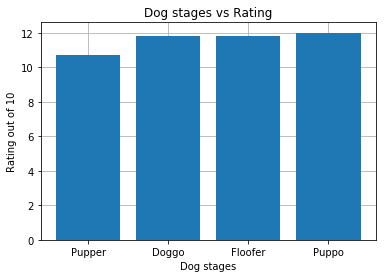

In [524]:
# Graph low vs high revenue movies in terms of budget
import matplotlib.pyplot as plt
% matplotlib inline

plt.grid(zorder=0)
plt.bar([1, 2, 3, 4], [pupper, doggo, floofer, puppo], tick_label=['Pupper', 'Doggo', 'Floofer', 'Puppo'], zorder=3)
plt.title('Dog stages vs Rating')
plt.ylabel('Rating out of 10')
plt.xlabel('Dog stages');

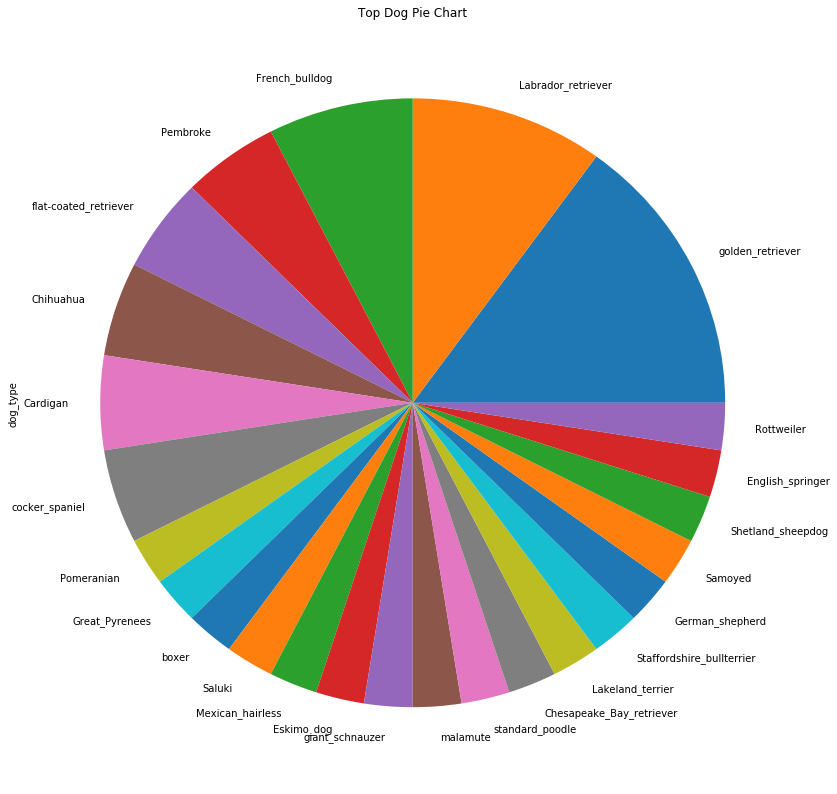

In [538]:
topdogchart.plot.pie(figsize=(14, 14))
plt.title('Top Dog Pie Chart');

### END